# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juanraigosa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_top_headlines(q='bitcoin', category='business', language='en')
bitcoin_news

{'status': 'ok',
 'totalResults': 17,
 'articles': [{'source': {'id': None, 'name': 'CoinDesk'},
   'author': 'Omkar Godbole',
   'title': 'Bitcoin Breakout Elusive as Traders Price in 7 Fed Rate Hikes for 2022 - CoinDesk',
   'description': 'The Fed is likely to raise rates by 25 basis points on Wednesday, the first hike since 2018.',
   'url': 'https://www.coindesk.com/markets/2022/03/15/bitcoin-breakout-elusive-as-traders-price-in-7-fed-rate-hikes-for-2022/',
   'urlToImage': 'https://www.coindesk.com/resizer/MDmJ-JtL5t8KMPLuB_S0Pdt-fGA=/1200x628/center/middle/cloudfront-us-east-1.images.arcpublishing.com/coindesk/NVYKCHKSNVGNHERF2Z3CDKLUFY.png',
   'publishedAt': '2022-03-15T08:36:00Z',
   'content': 'The leader in news and information on cryptocurrency, digital assets and the future of money, CoinDesk is a media outlet that strives for the highest journalistic standards and abides by astrict set … [+426 chars]'},
  {'source': {'id': None, 'name': 'This is Money'},
   'author': 'Th

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_top_headlines(q='ethereum', category='business', language='en')
ethereum_news

{'status': 'ok',
 'totalResults': 6,
 'articles': [{'source': {'id': None, 'name': 'Coingape'},
   'author': 'Ambar Warrick',
   'title': 'Live News: EU Votes On MiCA, Proof-Of-Work (PoW) Ban Amid Heavy Crypto Backlash - CoinGape',
   'description': 'The European Union opened voting on the adoption of its Markets in Crypto Assets (MiCA) regulation on Monday. Earlier reports had shown that a controversial ban on proof-of-work (POW) tokens including Bitcoin and Ethereum was still being considered, drawing w…',
   'url': 'https://coingape.com/eu-mica-vote-pow-ban/',
   'urlToImage': 'https://cdn.coingape.com/wp-content/uploads/2018/07/02173753/european-union-on-cryptocurrencies.jpg',
   'publishedAt': '2022-03-14T15:52:15Z',
   'content': 'The European Union opened voting on the adoption of its Markets in Crypto Assets (MiCA) regulation on Monday. Earlier reports had shown that a controversial ban on proof-of-work (POW) tokens includin… [+2368 chars]'},
  {'source': {'id': None, 'name': '

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-15,The leader in news and information on cryptocu...,0.1779,0.050,0.000,0.950
1,2022-03-15,"I invested £10,000 in bitcoin in late 2020 and...",0.2263,0.051,0.000,0.949
2,2022-03-15,March 15 (Reuters) - Bitcoin loves flirting wi...,0.3182,0.098,0.038,0.864
3,2022-03-15,Tesla and Spacex CEO Elon Musk has revealed th...,-0.1027,0.050,0.061,0.889
4,2022-03-14,But Bitcoin is still under scrutiny \r\nPower ...,0.0000,0.000,0.000,1.000


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-14,The European Union opened voting on the adopti...,-0.5719,0.047,0.150,0.803
1,2022-03-14,Bitcoin and ETH were once again consolidating ...,0.0000,0.000,0.000,1.000
2,2022-03-14,Bitcoin and cryptocurrency prices have been un...,-0.5859,0.000,0.138,0.862
3,2022-03-14,Cryptocurrency could soon endure a fresh pumme...,-0.1779,0.136,0.156,0.708
4,2022-03-13,Crypto assets are growing at a far faster pace...,0.5267,0.148,0.000,0.852


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,14.000000,14.000000,14.000000,14.000000
mean,0.095114,0.075429,0.054357,0.870286
std,0.370220,0.066813,0.066823,0.109556
min,-0.585900,0.000000,0.000000,0.599000
25%,-0.077025,0.047750,0.000000,0.854500
50%,0.114750,0.058500,0.019000,0.881500
75%,0.379775,0.096750,0.118750,0.943500
max,0.542300,0.244000,0.157000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,5.000000,5.000000,5.000000,5.000000
mean,-0.161800,0.066200,0.088800,0.845000
std,0.460574,0.071932,0.081322,0.105943
min,-0.585900,0.000000,0.000000,0.708000
25%,-0.571900,0.000000,0.000000,0.803000
50%,-0.177900,0.047000,0.138000,0.852000
75%,0.000000,0.136000,0.150000,0.862000
max,0.526700,0.148000,0.156000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin

In [35]:
bitcoin_text = []
for i in bitcoin_sentiments:
    text = i['text']
    bitcoin_text.append(text)

In [36]:
btc_tokens = []
for i in bitcoin_text:
    token = tokenizer(i)
    btc_tokens.append(token) 

In [37]:
bitcoin_df['tokens'] = btc_tokens
bitcoin_df

,date,text,compound,positive,negative,neutral,tokens
0,2022-03-15,The leader in news and information on cryptocu...,0.1779,0.050,0.000,0.950,"[leader, news, information, cryptocurrency, di..."
1,2022-03-15,"I invested £10,000 in bitcoin in late 2020 and...",0.2263,0.051,0.000,0.949,"[invested, bitcoin, late, despite, fall, peak,..."
2,2022-03-15,March 15 (Reuters) - Bitcoin loves flirting wi...,0.3182,0.098,0.038,0.864,"[march, reuters, bitcoin, love, flirting, main..."
3,2022-03-15,Tesla and Spacex CEO Elon Musk has revealed th...,-0.1027,0.050,0.061,0.889,"[tesla, spacex, ceo, elon, musk, ha, revealed,..."
4,2022-03-14,But Bitcoin is still under scrutiny \r\nPower ...,0.0000,0.000,0.000,1.000,"[bitcoin, still, scrutiny, power, cord, bitcoi..."
5,2022-03-14,A proposal that would have effectively banned ...,0.5423,0.244,0.157,0.599,"[proposal, would, effectively, banned, mining,..."
6,2022-03-14,The European Union opened voting on the adopti...,-0.5719,0.047,0.150,0.803,"[european, union, opened, voting, adoption, ma..."
7,2022-03-14,Bitcoin and ETH were once again consolidating ...,0.0000,0.000,0.000,1.000,"[bitcoin, eth, consolidating, start, week, des..."
8,2022-03-14,PRESS RELEASE.AscendEX is excited to announce ...,0.4003,0.073,0.000,0.927,"[press, releaseascendex, excited, announce, li..."
9,2022-03-14,"On Monday, Bitcoin, Ether and Dogecoin all got...",0.0516,0.066,0.061,0.874,"[monday, bitcoin, ether, dogecoin, got, quick,..."


In [ ]:
# Create a new tokens column for Ethereum

In [41]:
ethereum_text = []
for i in ethereum_sentiments:
    text = i['text']
    ethereum_text.append(text)

In [42]:
eth_tokens = []
for i in ethereum_text:
    token = tokenizer(i)
    eth_tokens.append(token)

In [43]:
ethereum_df['tokens'] = eth_tokens
ethereum_df

,date,text,compound,positive,negative,neutral,tokens
0,2022-03-14,The European Union opened voting on the adopti...,-0.5719,0.047,0.150,0.803,"[european, union, opened, voting, adoption, ma..."
1,2022-03-14,Bitcoin and ETH were once again consolidating ...,0.0000,0.000,0.000,1.000,"[bitcoin, eth, consolidating, start, week, des..."
2,2022-03-14,Bitcoin and cryptocurrency prices have been un...,-0.5859,0.000,0.138,0.862,"[bitcoin, cryptocurrency, price, pressure, bit..."
3,2022-03-14,Cryptocurrency could soon endure a fresh pumme...,-0.1779,0.136,0.156,0.708,"[cryptocurrency, could, soon, endure, fresh, p..."
4,2022-03-13,Crypto assets are growing at a far faster pace...,0.5267,0.148,0.000,0.852,"[crypto, asset, growing, far, faster, pace, in..."


### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [82]:
from collections import Counter
from nltk import ngrams

In [104]:
# Generate the Bitcoin N-grams where N=2

for i in btc_tokens:
    bigram = ngrams(i, n=2)
    print(dict(bigram))

{'leader': 'news', 'news': 'information', 'information': 'cryptocurrency', 'cryptocurrency': 'digital', 'digital': 'asset', 'asset': 'future', 'future': 'money', 'money': 'coindesk', 'coindesk': 'medium', 'medium': 'outlet', 'outlet': 'strives', 'strives': 'highest', 'highest': 'journalistic', 'journalistic': 'standard', 'standard': 'abides', 'abides': 'astrict', 'astrict': 'set', 'set': 'char'}
{'invested': 'bitcoin', 'bitcoin': 'late', 'late': 'despite', 'despite': 'fall', 'fall': 'peak', 'peak': 'november', 'november': 'ive', 'ive': 'still', 'still': 'roughly', 'roughly': 'trebled', 'trebled': 'moneymy', 'moneymy': 'initial', 'initial': 'investment', 'investment': 'worth', 'worth': 'thin', 'thin': 'char'}
{'march': 'reuters', 'reuters': 'bitcoin', 'bitcoin': 'love', 'love': 'flirting', 'flirting': 'mainstream', 'mainstream': 'us', 'us': 'president', 'president': 'say', 'say': 'want', 'want': 'get', 'get': 'serious', 'serious': 'may', 'may': 'getting', 'getting': 'cold', 'cold': 'cry

In [105]:
# Generate the Ethereum N-grams where N=2
for i in eth_tokens:
    bigram = ngrams(i, n=2)
    print(dict(bigram))

{'european': 'union', 'union': 'opened', 'opened': 'voting', 'voting': 'adoption', 'adoption': 'markets', 'markets': 'crypto', 'crypto': 'assets', 'assets': 'mica', 'mica': 'regulation', 'regulation': 'monday', 'monday': 'earlier', 'earlier': 'report', 'report': 'shown', 'shown': 'controversial', 'controversial': 'ban', 'ban': 'proofofwork', 'proofofwork': 'pow', 'pow': 'token', 'token': 'includin', 'includin': 'char'}
{'bitcoin': 'ethereum', 'eth': 'consolidating', 'consolidating': 'start', 'start': 'week', 'week': 'despite', 'despite': 'bullish', 'bullish': 'comment', 'comment': 'elon', 'elon': 'musk', 'musk': 'said', 'tweet': 'earlier', 'earlier': 'today', 'today': 'musk', 'said': 'still', 'still': 'amp', 'amp': 'wont', 'wont': 'sell', 'sell': 'bitcoin', 'ethereum': 'char'}
{'bitcoin': 'price', 'cryptocurrency': 'price', 'price': 'losing', 'pressure': 'bitcoin', 'losing': 'almost', 'almost': 'far', 'far': 'yearsubscribenow', 'yearsubscribenow': 'forbes', 'forbes': 'cryptoasset', 'cr

In [106]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [180]:
# Use token_count to get the top 10 words for Bitcoin

tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(tokens, 10)                   

[('bitcoin', 10),
 ('musk', 5),
 ('elon', 4),
 ('still', 3),
 ('mining', 3),
 ('european', 3),
 ('union', 3),
 ('token', 3),
 ('sell', 3),
 ('cryptocurrency', 2)]

In [181]:
# Use token_count to get the top 10 words for Ethereum

tokens = tokenizer(ethereum_df.text.str.cat())
token_count(tokens, 10)

[('european', 2),
 ('union', 2),
 ('earlier', 2),
 ('ban', 2),
 ('charsbitcoin', 2),
 ('musk', 2),
 ('amp', 2),
 ('bitcoin', 2),
 ('price', 2),
 ('far', 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [ ]:
# Generate the Bitcoin word cloud

In [137]:
btc_list = []
for i in btc_tokens:
    for j in i:
        btc_token = j
        btc_list.append(btc_token)

In [138]:
btc_string = ' '.join([str(i) for i in btc_list])

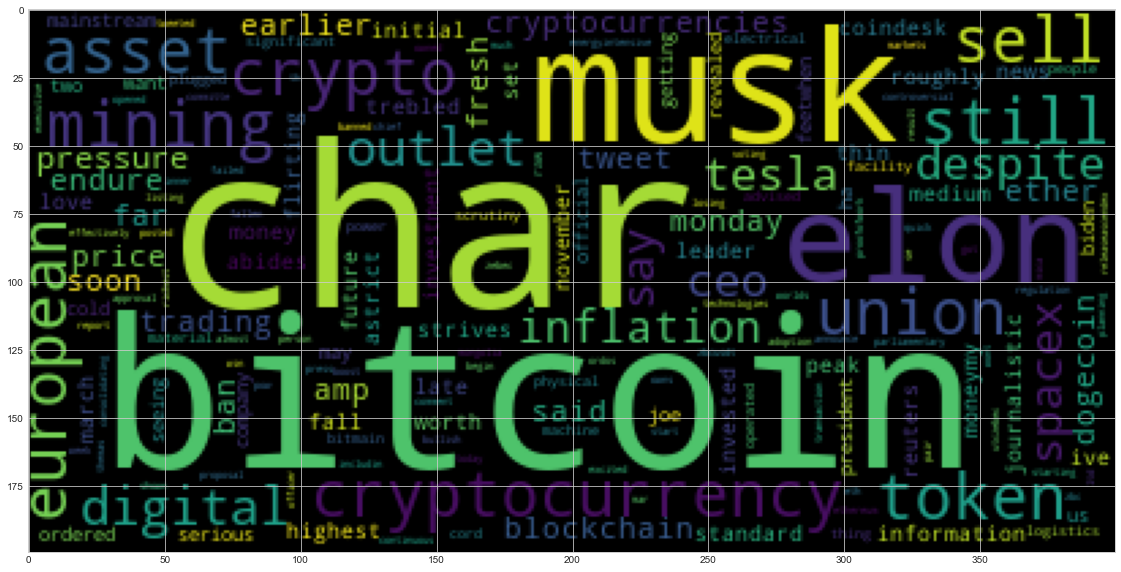

In [139]:
wc = WordCloud(collocations=False).generate(btc_string)
plt.imshow(wc)

In [140]:
# Generate the Ethereum word cloud

In [141]:
eth_list = []
for i in eth_tokens:
    for j in i:
        eth_token = j
        eth_list.append(eth_token)

In [142]:
eth_string = ' '.join([str(i) for i in eth_list])

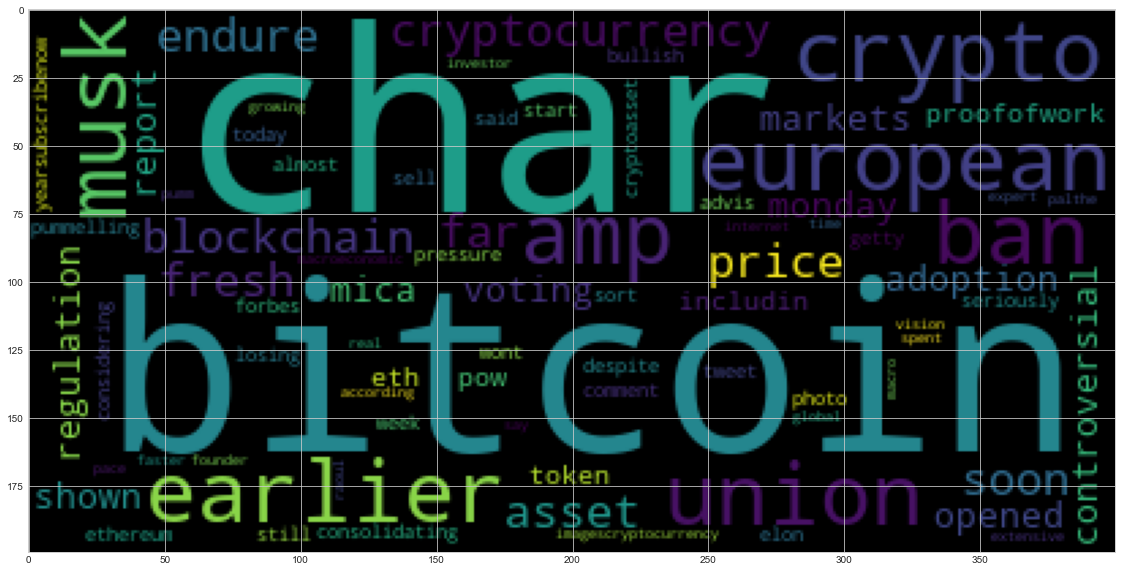

In [143]:
wc = WordCloud(collocations=False).generate(eth_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [146]:
import spacy
from spacy import displacy

In [169]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [144]:
# Concatenate all of the Bitcoin text together
btc_string

'leader news information cryptocurrency digital asset future money coindesk medium outlet strives highest journalistic standard abides astrict set char invested bitcoin late despite fall peak november ive still roughly trebled moneymy initial investment worth thin char march reuters bitcoin love flirting mainstream us president say want get serious may getting cold crypto feetwhen joe biden ordered official char tesla spacex ceo elon musk ha revealed two company seeing significant inflation pressure raw material logistics advised people physical thing inflation char bitcoin still scrutiny power cord bitcoin mining machine plugged electrical outlet mining facility operated bitmain technologies ltd ordos inner mongolia char proposal would effectively banned mining transaction energyintensive cryptocurrencies bitcoin european union failed win approval parliamentary committe char european union opened voting adoption markets crypto assets mica regulation monday earlier report shown controv

In [186]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_string)

In [196]:
# Add a title to the document
btc_ner.user_data['title']= 'BITCOIN NER'

In [197]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [152]:
# List all Entities
print([ent.text for ent in btc_ner.ents ])

['leader news information', 'november', 'reuters', 'joe biden', 'two', 'european union', 'committe', 'european union', 'monday', 'includin', 'earlier today', 'zbcusdt', 'monday', 'themas', 'european union']


---

### Ethereum NER

In [153]:
# Concatenate all of the Ethereum text together
eth_string

'european union opened voting adoption markets crypto assets mica regulation monday earlier report shown controversial ban proofofwork pow token includin char bitcoin eth consolidating start week despite bullish comment elon musk tweet earlier today musk said still amp wont sell bitcoin ethereum char bitcoin cryptocurrency price pressure bitcoin price losing almost far yearsubscribenow forbes cryptoasset amp blockchain advis char cryptocurrency could soon endure fresh pummelling european union seriously considering ban sort blockchain photo getty imagescryptocurrency could soon endure fresh pumm char crypto asset growing far faster pace internet according macroeconomic expert raoul palthe founder real vision global macro investor say spent extensive time char'

In [158]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_string)

In [198]:
# Add a title to the document
eth_ner.user_data['title']= 'ETHEREUM NER'

In [199]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [200]:
# List all Entities
print([ent.text for ent in eth_ner.ents ])

['european union', 'monday', 'includin', 'earlier today', 'european union']


---